In [1]:
%load_ext autoreload
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%autoreload 2
import sys
sys.path.insert(1, '../../SyMBac/')


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib
from matplotlib_scalebar.scalebar import ScaleBar
import tifffile
from microfilm.colorify import cmaps_def
import scipy
import scienceplots
from seaborn import move_legend
from copy import deepcopy
plt.style.use('nature')

matplotlib.rcParams["xtick.minor.bottom"]=False
matplotlib.rcParams["xtick.top"]=False
matplotlib.rcParams["ytick.minor.left"]=False
matplotlib.rcParams["ytick.right"]=False
matplotlib.rcParams["font.size"] = 6
#matplotlib.rcParams["axes.labelpad"] = 0
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["xtick.minor.visible"] = False
matplotlib.rcParams["ytick.minor.visible"] = False
matplotlib.rcParams["xtick.direction"] = "out"
matplotlib.rcParams["ytick.direction"] = "out"
matplotlib.rcParams["legend.fontsize"] = 6
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["xtick.labelsize"] = 6
matplotlib.rcParams["ytick.labelsize"] = 6
matplotlib.rcParams["axes.labelsize"] = 6
plt.rcParams['figure.titlesize'] = 6
matplotlib.rcParams["grid.alpha"] = 0
matplotlib.rcParams["savefig.transparent"] = True
matplotlib.rcParams["axes.titlesize"] = 6

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import zarr
from glob import glob
import pandas as pd
import seaborn as sns
from matplotlib import cm

from skimage.measure import regionprops_table, label
import matplotlib
import scienceplots


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tifffile 
import nd2
from stardist import random_label_cmap
cmap = random_label_cmap()

In [3]:
masks =  (np.array(Image.open("../../microcolony_analysis/real_data/100x_SB5_dilute002_segmented/002.png")))
image = nd2.imread("../../microcolony_analysis/real_data/agar_pads/100x_SB5_dilute002.nd2")

In [4]:
image.shape

(183, 2, 2304, 2304)

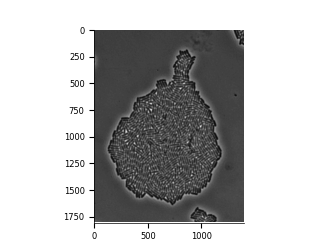

In [5]:
plt.imshow(image[2,0][500:,599:2000],cmap="Greys_r")

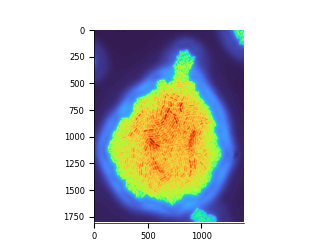

In [6]:
plt.imshow(image[2,1][500:,599:2000],cmap="turbo")

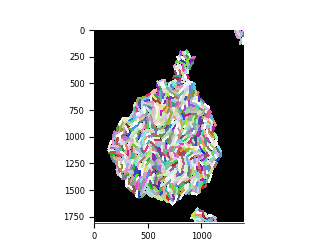

In [7]:
plt.imshow(masks[500:,599:2000], interpolation="none", cmap=cmap)

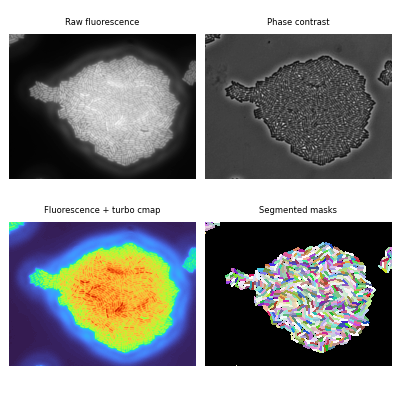

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(4,4))
axs[0,1].imshow(np.rot90(image[2,0][500:,599:2000]),cmap="Greys_r")
axs[0,1].set_title("Phase contrast")
axs[0,0].imshow(np.rot90(image[2,1][500:,599:2000]),cmap="Greys_r")
axs[0,0].set_title("Raw fluorescence") 
axs[1,0].imshow(np.rot90(image[2,1][500:,599:2000]),cmap="turbo")
axs[1,0].set_title("Fluorescence + turbo cmap")
axs[1,1].imshow(np.rot90(masks[500:,599:2000]), interpolation="none", cmap=cmap)
axs[1,1].set_title("Segmented masks")
for ax in axs.flatten():
    ax.set_axis_off()
plt.tight_layout()
plt.savefig("segmentation.png",dpi=300)